# DATA CLEANING #

**1) Removing NaN values**

In [106]:
import pandas as pd

df = pd.read_csv('A2Z_insurance.csv')

df.shape

(10296, 14)

In [107]:
df_no_prob = df[~(df['First Policy´s Year'] < df['Brithday Year'])]
df_no_prob.shape
#df_no_prob.isnull().sum()

(8299, 14)

In [108]:
df = df[df['First Policy´s Year'] >= df['Brithday Year']]

df.shape

(8255, 14)

In [109]:

df.isnull().sum()

Customer Identity                       0
First Policy´s Year                     0
Brithday Year                           0
Educational Degree                      1
Gross Monthly Salary                   22
Geographic Living Area                  0
Has Children (Y=1)                     10
Customer Monetary Value                 0
Claims Rate                             0
Premiums in LOB: Motor                 26
Premiums in LOB: Household              0
Premiums in LOB: Health                31
Premiums in LOB:  Life                 92
Premiums in LOB: Work Compensations    69
dtype: int64

In [110]:
#There aren't duplicated rows
df.duplicated('Customer Identity').sum()

0

In [111]:
#Age Columns
df['Age'] = 2016 - df['Brithday Year']
df['Age As Client'] = 2016 - df['First Policy´s Year']
df.columns
df.isnull().sum()

Customer Identity                       0
First Policy´s Year                     0
Brithday Year                           0
Educational Degree                      1
Gross Monthly Salary                   22
Geographic Living Area                  0
Has Children (Y=1)                     10
Customer Monetary Value                 0
Claims Rate                             0
Premiums in LOB: Motor                 26
Premiums in LOB: Household              0
Premiums in LOB: Health                31
Premiums in LOB:  Life                 92
Premiums in LOB: Work Compensations    69
Age                                     0
Age As Client                           0
dtype: int64

In [112]:
#Ordering the columns

df = df[['Customer Identity', 'First Policy´s Year', 'Brithday Year', 'Age', 'Age As Client', 'Claims Rate',
       'Customer Monetary Value', 'Educational Degree',
       'Geographic Living Area', 'Gross Monthly Salary', 'Has Children (Y=1)',
       'Premiums in LOB:  Life', 'Premiums in LOB: Health',
       'Premiums in LOB: Household', 'Premiums in LOB: Motor',
       'Premiums in LOB: Work Compensations']]

#df[df['First Policy´s Year'] < df['Brithday Year']]

In [113]:
df.isnull().sum()
df.shape

(8255, 16)

In [114]:
#Removing the guy from the future and the one with 965y.

df = df[(df['Brithday Year'] != 1028.0) & (df['First Policy´s Year'] != 53784)]

df.shape

(8253, 16)

In [115]:
df.describe()

,Customer Identity,First Policy´s Year,Brithday Year,Age,Age As Client,Claims Rate,Customer Monetary Value,Geographic Living Area,Gross Monthly Salary,Has Children (Y=1),Premiums in LOB: Life,Premiums in LOB: Health,Premiums in LOB: Household,Premiums in LOB: Motor,Premiums in LOB: Work Compensations
count,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8253.000000,8231.000000,8243.000000,8161.000000,8222.000000,8253.000000,8227.000000,8184.000000
mean,5121.525264,1986.934085,1962.663516,53.336484,29.065915,0.750775,161.142079,2.716830,2788.833313,0.676938,33.640404,164.392064,170.608845,330.026773,33.444437
std,2969.690848,6.525651,14.675727,14.675727,6.525651,3.248216,2161.922697,1.263858,1033.742883,0.467675,37.098214,110.090395,347.457857,218.567944,44.003508
min,1.000000,1974.000000,1935.000000,19.000000,18.000000,0.000000,-165680.420000,1.000000,341.000000,0.000000,-7.000000,-2.110000,-75.000000,6.780000,-12.000000
25%,2553.000000,1982.000000,1951.000000,42.000000,23.000000,0.390000,-10.330000,1.000000,2134.000000,0.000000,8.780000,106.910000,40.000000,228.820000,8.862500
50%,5107.000000,1987.000000,1962.000000,54.000000,29.000000,0.720000,186.710000,3.000000,2810.000000,1.000000,21.670000,157.920000,112.250000,329.840000,22.450000
75%,7679.000000,1993.000000,1974.000000,65.000000,34.000000,0.980000,394.870000,4.000000,3452.000000,1.000000,47.010000,214.122500,240.050000,426.525000,46.340000
max,10296.000000,1998.000000,1997.000000,81.000000,42.000000,256.200000,11875.890000,4.000000,55215.000000,1.000000,313.280000,7322.480000,25048.800000,11604.420000,1988.700000


In [116]:
#Replacing the NaN values of Living Area column with the mode.

mode_geo = df['Geographic Living Area'].mode()
print(mode_geo)

df['Geographic Living Area'] = df['Geographic Living Area'].fillna(4.0)

df['Geographic Living Area'].isnull().sum()

0    4.0
dtype: float64


0

In [117]:
df_edu = df[['Educational Degree', 'Gross Monthly Salary']]
#df_edu

df_not_nan = df_edu[df_edu.notna().any(axis = 1)]

df_notNA_grouped = df_not_nan.groupby(['Educational Degree'])['Gross Monthly Salary'].median()
df_notNA_grouped

Educational Degree
1 - Basic          2740.0
2 - High School    2799.0
3 - BSc/MSc        2821.0
4 - PhD            2803.0
Name: Gross Monthly Salary, dtype: float64

In [118]:
df_nan = df_edu[df_edu.isnull().any(axis = 1)]
df_nan

,Educational Degree,Gross Monthly Salary
21,2 - High School,NaN
143,3 - BSc/MSc,NaN
488,3 - BSc/MSc,NaN
830,2 - High School,NaN
1707,NaN,3827.0
1780,3 - BSc/MSc,NaN
1816,3 - BSc/MSc,NaN
1851,3 - BSc/MSc,NaN
1872,2 - High School,NaN
2241,3 - BSc/MSc,NaN


In [119]:
#Replacing the NaN values of Educational Degree column based on the mean of gross salary of which level of education.

df.loc[1707,'Educational Degree'] = '4 - PhD'

df.loc[21,'Gross Monthly Salary'] = 2799.0

df.loc[143,'Gross Monthly Salary'] = 2821.0

df.loc[488,'Gross Monthly Salary'] = 2821.0

df.loc[830,'Gross Monthly Salary'] = 2799.0

df.loc[1780,'Gross Monthly Salary'] = 2821.0

df.loc[1816,'Gross Monthly Salary'] = 2821.0

df.loc[1851,'Gross Monthly Salary'] = 2821.0

df.loc[1872,'Gross Monthly Salary'] = 2799.0

df.loc[2241,'Gross Monthly Salary'] = 2821.0

df.loc[3227,'Gross Monthly Salary'] = 2803.0

df.loc[3317,'Gross Monthly Salary'] = 2799.0

df.loc[3477,'Gross Monthly Salary'] = 2740.0

df.loc[3972,'Gross Monthly Salary'] = 2799.0

df.loc[4847,'Gross Monthly Salary'] = 2821.0

df.loc[5574,'Gross Monthly Salary'] = 2821.0

df.loc[7371,'Gross Monthly Salary'] = 2821.0

df.loc[5082,'Gross Monthly Salary'] = 2799.0

df.loc[7453,'Gross Monthly Salary'] = 2740.0

df.loc[8677,'Gross Monthly Salary'] = 2740.0

df.loc[9276,'Gross Monthly Salary'] = 2821.0

df.loc[9904,'Gross Monthly Salary'] = 2821.0

df.loc[9960,'Gross Monthly Salary'] = 2799.0


df['Gross Monthly Salary'].isnull().sum()

0

In [120]:
df.isnull().sum()

Customer Identity                       0
First Policy´s Year                     0
Brithday Year                           0
Age                                     0
Age As Client                           0
Claims Rate                             0
Customer Monetary Value                 0
Educational Degree                      0
Geographic Living Area                  0
Gross Monthly Salary                    0
Has Children (Y=1)                     10
Premiums in LOB:  Life                 92
Premiums in LOB: Health                31
Premiums in LOB: Household              0
Premiums in LOB: Motor                 26
Premiums in LOB: Work Compensations    69
dtype: int64

In [121]:
df['premiums_sum'] = df['Premiums in LOB: Motor'] +  df['Premiums in LOB: Household'] + df['Premiums in LOB: Health'] + df['Premiums in LOB:  Life'] + df['Premiums in LOB: Work Compensations']

In [122]:
df = df[df['premiums_sum'] < df['Gross Monthly Salary']*12]

In [123]:
df = df[df['Gross Monthly Salary'] > 530]

In [124]:
df.isnull().sum()

Customer Identity                       0
First Policy´s Year                     0
Brithday Year                           0
Age                                     0
Age As Client                           0
Claims Rate                             0
Customer Monetary Value                 0
Educational Degree                      0
Geographic Living Area                  0
Gross Monthly Salary                    0
Has Children (Y=1)                     10
Premiums in LOB:  Life                  0
Premiums in LOB: Health                 0
Premiums in LOB: Household              0
Premiums in LOB: Motor                  0
Premiums in LOB: Work Compensations     0
premiums_sum                            0
dtype: int64

In [125]:
df[df.Age < 16]

,Customer Identity,First Policy´s Year,Brithday Year,Age,Age As Client,Claims Rate,Customer Monetary Value,Educational Degree,Geographic Living Area,Gross Monthly Salary,Has Children (Y=1),Premiums in LOB: Life,Premiums in LOB: Health,Premiums in LOB: Household,Premiums in LOB: Motor,Premiums in LOB: Work Compensations,premiums_sum


In [126]:
## Clusters

In [127]:
import os
import numpy as np
import seaborn as sb
import matplotlib
from matplotlib import pyplot as plt

In [128]:
var_cluster = df[['Premiums in LOB:  Life',
                'Premiums in LOB: Health',
                'Premiums in LOB: Household',
                'Premiums in LOB: Motor',
                'Premiums in LOB: Work Compensations']]

## Outliers

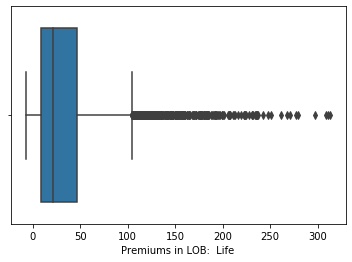

In [129]:
import seaborn as sns
sns.boxplot(x=var_cluster['Premiums in LOB:  Life'])

In [130]:
var_cluster = var_cluster[var_cluster['Premiums in LOB:  Life'] <= 80]

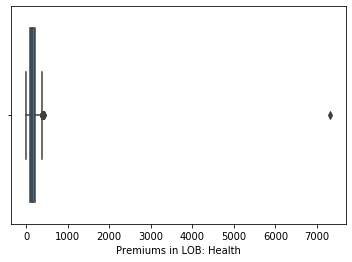

In [131]:
sns.boxplot(x=var_cluster['Premiums in LOB: Health'])

In [132]:
var_cluster = var_cluster[var_cluster['Premiums in LOB: Health'] < 365]

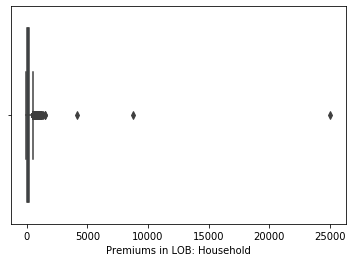

In [133]:
sns.boxplot(x=var_cluster['Premiums in LOB: Household'])

In [134]:
var_cluster = var_cluster[var_cluster['Premiums in LOB: Household'] < 390]

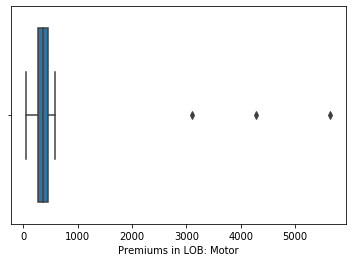

In [135]:
sns.boxplot(x=var_cluster['Premiums in LOB: Motor'])

In [136]:
var_cluster = var_cluster[var_cluster['Premiums in LOB: Motor'] < 1000]

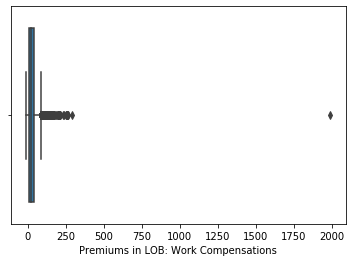

In [137]:
sns.boxplot(x=var_cluster['Premiums in LOB: Work Compensations'])

In [138]:
var_cluster = var_cluster[var_cluster['Premiums in LOB: Work Compensations'] < 70]

In [139]:
var_cluster.shape

(6052, 5)

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

CA_Norm = scaler.fit_transform(var_cluster)

CA_Norm = pd.DataFrame(CA_Norm, columns = var_cluster.columns)

CA_Norm.head()

,Premiums in LOB: Life,Premiums in LOB: Health,Premiums in LOB: Household,Premiums in LOB: Motor,Premiums in LOB: Work Compensations
0,1.318476,-0.131669,-0.243464,0.059082,-0.182952
1,0.720089,2.071100,-0.595511,-1.809621,0.430745
2,-0.129035,0.352563,-0.552115,-0.300704,1.133414
3,-0.733062,-0.553485,-0.833948,0.686268,-0.677125
4,-0.339778,2.161718,1.864433,-2.056630,0.323549


## Reduce the dimention ##

In [160]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 'mle')
principalComponents = pca.fit_transform(CA_Norm)

In [161]:
pca.explained_variance_ratio_

array([0.59970521, 0.14916959, 0.12778837, 0.1209775 ])

In [162]:
pca.components_

array([[ 0.40748813,  0.47441932,  0.37842913, -0.55729821,  0.39381447],
       [ 0.26484165, -0.63874267,  0.56568702,  0.28148286,  0.35018896],
       [-0.21750895,  0.12773876,  0.69178723, -0.05697347, -0.67420851],
       [ 0.83256515, -0.1026442 , -0.2071396 ,  0.02546463, -0.50273668]])

In [163]:
pca.singular_values_

array([134.71109695,  67.18535421,  62.18421181,  60.50437235])

In [164]:
pca.inverse_transform(principalComponents)

array([[ 1.30043099, -0.20055287, -0.25808078, -0.03289192, -0.19740706],
       [ 0.73723518,  2.13655301, -0.58162228, -1.72222768,  0.44448034],
       [-0.13241636,  0.33965684, -0.55485354, -0.31793639,  1.13070548],
       ...,
       [-0.60961483,  0.16230719, -0.55149473,  0.1346231 , -0.31134298],
       [-0.44413264, -0.19348445,  0.27534532,  0.3183544 , -0.82757138],
       [-0.74535731, -0.22536993, -0.10257412,  0.39461384, -0.40267429]])

In [165]:
pca.n_components_

4

In [166]:
pca.n_features_

5

## TO DO: FACTOR ANALYSIS ##

In [167]:
from sklearn.cluster import KMeans

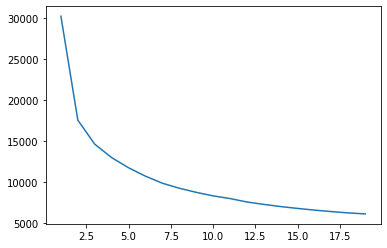

In [168]:
L = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,
                   random_state=0,
                   n_init=5,
                   max_iter=200).fit(CA_Norm)
    L.append(kmeans.inertia_)
plt.plot(range(1,20),L)

In [169]:
kmeans = KMeans(n_clusters=3,
               random_state=0,
               n_init= 10,
               max_iter= 2000).fit(CA_Norm)

In [170]:
my_clusters = kmeans.cluster_centers_
inv = scaler.inverse_transform(X = my_clusters)
df_cluster = pd.DataFrame(inv, columns = CA_Norm.columns)

In [171]:
df_cluster

,Premiums in LOB: Life,Premiums in LOB: Health,Premiums in LOB: Household,Premiums in LOB: Motor,Premiums in LOB: Work Compensations
0,18.911080,173.269805,105.913723,355.371695,20.248234
1,42.074595,223.626914,193.574034,248.226190,37.094686
2,7.716795,85.937674,33.741179,479.081263,7.349864


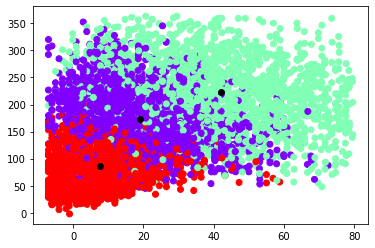

In [172]:
plt.scatter(var_cluster.iloc[:, 0].values, var_cluster.iloc[:, 1].values, c=kmeans.labels_, cmap='rainbow') #c=kmeans, cmap='viridis')
# add centroids
plt.scatter(df_cluster.iloc[:, 0].values, df_cluster.iloc[:, 1].values, c='black')